# LAB 01

## Load Libraries

In [26]:
from rasterio.plot import show
import rasterio
import geotiff
import tifffile
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load Raster

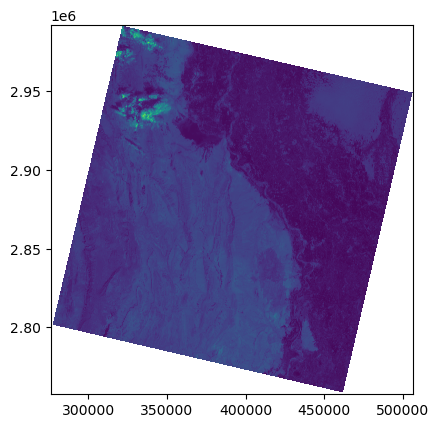

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [40]:
img = rasterio.open(r"G:\Personal\hyperspectral\New folder\Nawabshah_Landsat8.tif") #Landsat8 imagery of Nawabshah
show(img)
pixels = img.read(1)
pixels

# To Display Metadata of Raster

In [34]:
with rasterio.open(r"G:\Personal\hyperspectral\New folder\Nawabshah_Landsat8.tif") as dataset:
    # Check the size (dimensions)
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)

    # Check the number of bands
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 7681 x 7841
Number of Bands: 3


In [35]:
dataset.count
dataset.width
dataset.height

7841

# Using Matplotlib Library

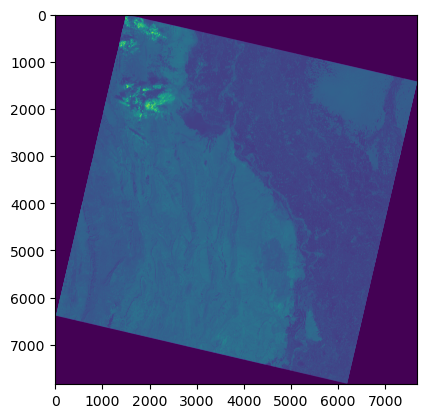

In [36]:
plt.imshow(pixels)

## Reducing Size of the Raster

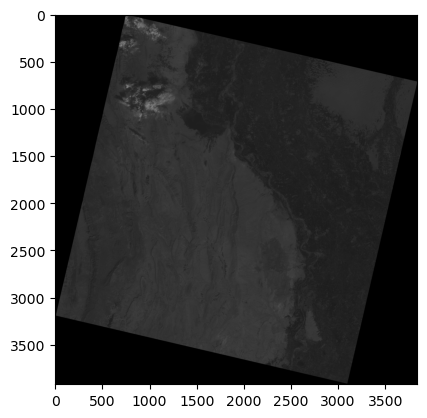

In [48]:

try:
    # Read image from disk.
    img = cv2.imread(r"G:\Personal\hyperspectral\New folder\Nawabshah_Landsat8.tif")
 
    # Get number of pixel horizontally and vertically. 
    (height, width) = img.shape[:2]    
 
    # Specify the size of image along with interpolation methods.
    # cv2.INTER_AREA is used for shrinking, whereas cv2.INTER_CUBIC
    # is used for zooming.
    res = cv2.resize(img, (int(width / 2), int(height / 2)), interpolation=cv2.INTER_CUBIC)
 
    # Write image back to disk.
    cv2.imwrite('result.tiff', res)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res)

# Creating Array and acquiring Statistics

In [51]:
# Open the image
img = Image.open('result.tiff') #the resized tiff file
from PIL import Image

# Convert the image to a NumPy array
img_array = np.array(img)

# Calculate image statistics
mean = np.mean(img_array)
std_dev = np.std(img_array)
min = np.min(img_array)
max = np.max(img_array)

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Min:", min)
print("Max:", max)

width, height = img.size
# Print the results
print("Width of Raster:", width)
print("Height of Raster:", height)

Mean: 30.968909970238094
Standard Deviation: 22.541399404407603
Min: 0
Max: 159
Width of Raster: 3840
Height of Raster: 3920


# Rotating Tiff Images

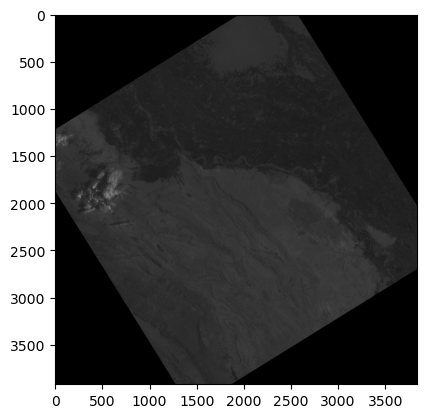

In [52]:
try:
    # Read image from disk.
    img = cv2.imread('result.tiff')
 
     # Shape of image in terms of pixels.
    (rows, cols) = img.shape[:2]
 
    # getRotationMatrix2D creates a matrix needed for transformation.
    # We want matrix for rotation w.r.t center to 45 degree without scaling.
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    res1 = cv2.warpAffine(img, M, (cols, rows))
 
    # Write image back to disk.
    cv2.imwrite('result.tiff', res1)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res1)

# Translating Matrix

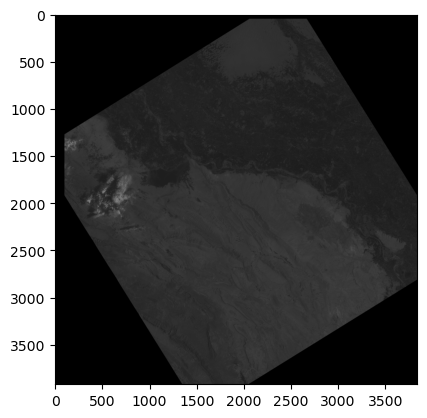

In [53]:
# Let's shift by (100, 50).
M = np.float32([[1, 0, 100], [0, 1, 50]])
try:
    # Read image from disk.
    img = cv2.imread('result.tiff')
 
     # warpAffine does appropriate shifting given the
    # translation matrix.
    res2 = cv2.warpAffine(img, M, (cols, rows))
 
    # Write image back to disk.
    cv2.imwrite('result.tiff', res2)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res2)

# Canny Edge Detection

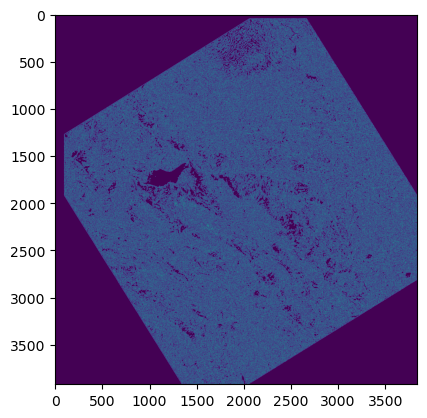

In [56]:

try:
    # Read image from disk.
    img = cv2.imread('result.tiff')
     
     # Canny edge detection.
    edges = cv2.Canny(img, 15, 10)
 
    # Write image back to disk.
    cv2.imwrite('result.tiff', edges)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(edges)
#plt.imshow(img)

## RGB

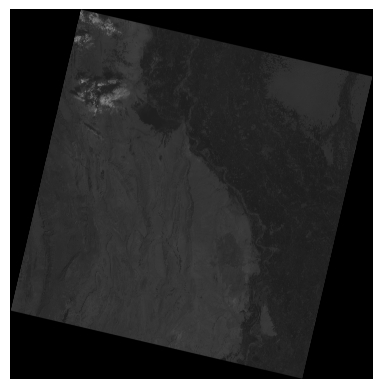

In [58]:
# Read the image
img2 = cv2.imread(r"G:\Personal\hyperspectral\New folder\Nawabshah_Landsat8.tif")

# Convert BGR to RGB color space (matplotlib expects RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img2_rgb)
plt.axis('off')  # Remove axis ticks and labels
plt.show()